# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | bardai
Processing Record 4 of Set 1 | az zuwaytinah
Processing Record 5 of Set 1 | lompoc
Processing Record 6 of Set 1 | okhotsk
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | el bolson
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | xiva
Processing Record 11 of Set 1 | minas de marcona
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | selfoss
Processing Record 16 of Set 1 | margaret river
Processing Record 17 of Set 1 | rongelap
Processing Record 18 of Set 1 | laguna
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | hami
Processing Record 21 of Set 1 | east london
Processing Record 22 of Set 1 | port-aux-francais
Processing R

Processing Record 40 of Set 4 | san antonio de pale
Processing Record 41 of Set 4 | bay roberts
Processing Record 42 of Set 4 | rosarito
Processing Record 43 of Set 4 | san rafael del yuma
Processing Record 44 of Set 4 | luderitz
Processing Record 45 of Set 4 | ryotsu-minato
Processing Record 46 of Set 4 | bengkulu
Processing Record 47 of Set 4 | onverwacht
Processing Record 48 of Set 4 | las heras
Processing Record 49 of Set 4 | sogndal
Processing Record 0 of Set 5 | wattens
Processing Record 1 of Set 5 | wynyard
Processing Record 2 of Set 5 | margate
Processing Record 3 of Set 5 | mili
Processing Record 4 of Set 5 | zhaotong
Processing Record 5 of Set 5 | smithers
Processing Record 6 of Set 5 | yulinshi
Processing Record 7 of Set 5 | edd
Processing Record 8 of Set 5 | badger
Processing Record 9 of Set 5 | kosan
Processing Record 10 of Set 5 | changping
Processing Record 11 of Set 5 | newnham
Processing Record 12 of Set 5 | plettenberg bay
Processing Record 13 of Set 5 | neftcala
Proc

Processing Record 33 of Set 8 | goondiwindi
Processing Record 34 of Set 8 | mary
Processing Record 35 of Set 8 | acapulco de juarez
Processing Record 36 of Set 8 | toga village
City not found. Skipping...
Processing Record 37 of Set 8 | paysandu
Processing Record 38 of Set 8 | basse-terre
Processing Record 39 of Set 8 | cadale
Processing Record 40 of Set 8 | urangan
Processing Record 41 of Set 8 | center
Processing Record 42 of Set 8 | buka
Processing Record 43 of Set 8 | nizhniy kuranakh
Processing Record 44 of Set 8 | yanam
Processing Record 45 of Set 8 | whitehorse
Processing Record 46 of Set 8 | happy valley-goose bay
Processing Record 47 of Set 8 | tulun
Processing Record 48 of Set 8 | emiliano zapata
Processing Record 49 of Set 8 | utrik
Processing Record 0 of Set 9 | ballina
Processing Record 1 of Set 9 | haiku-pauwela
Processing Record 2 of Set 9 | safotu
Processing Record 3 of Set 9 | vingt cinq
City not found. Skipping...
Processing Record 4 of Set 9 | emerald
Processing Reco

Processing Record 25 of Set 12 | capayan
Processing Record 26 of Set 12 | turgen
Processing Record 27 of Set 12 | mirny
Processing Record 28 of Set 12 | beyneu
Processing Record 29 of Set 12 | pahrump
Processing Record 30 of Set 12 | at taj
Processing Record 31 of Set 12 | zakynthos
Processing Record 32 of Set 12 | kuta
Processing Record 33 of Set 12 | sandpoint
Processing Record 34 of Set 12 | pudasjarvi
Processing Record 35 of Set 12 | nyala
Processing Record 36 of Set 12 | lorengau
Processing Record 37 of Set 12 | hasaki
Processing Record 38 of Set 12 | saint-francois
Processing Record 39 of Set 12 | portland
Processing Record 40 of Set 12 | khandyga
Processing Record 41 of Set 12 | swakopmund
Processing Record 42 of Set 12 | kosh-agach
Processing Record 43 of Set 12 | lerwick
Processing Record 44 of Set 12 | maizuru
Processing Record 45 of Set 12 | zyrya
Processing Record 46 of Set 12 | tongliao
Processing Record 47 of Set 12 | sisimiut
Processing Record 48 of Set 12 | webuye
Proce

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,21.76,40,6,0.45,US,1685140525
1,lebu,-37.6167,-73.6500,9.77,76,99,3.93,CL,1685140717
2,bardai,11.6500,7.2333,26.62,63,100,5.23,NG,1685140717
3,az zuwaytinah,30.9522,20.1202,19.67,81,1,5.00,LY,1685140718
4,lompoc,34.6391,-120.4579,23.72,68,0,5.81,US,1685140718


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,21.76,40,6,0.45,US,1685140525
1,lebu,-37.6167,-73.6500,9.77,76,99,3.93,CL,1685140717
2,bardai,11.6500,7.2333,26.62,63,100,5.23,NG,1685140717
3,az zuwaytinah,30.9522,20.1202,19.67,81,1,5.00,LY,1685140718
4,lompoc,34.6391,-120.4579,23.72,68,0,5.81,US,1685140718


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

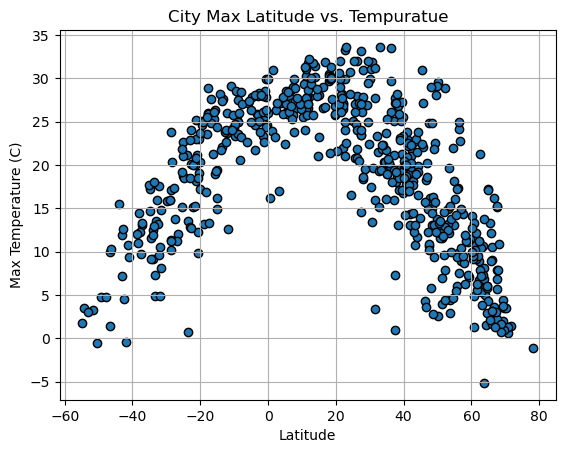

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, edgecolor='black')


# Incorporate the other graph properties
plt.title('City Max Latitude vs. Tempuratue')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

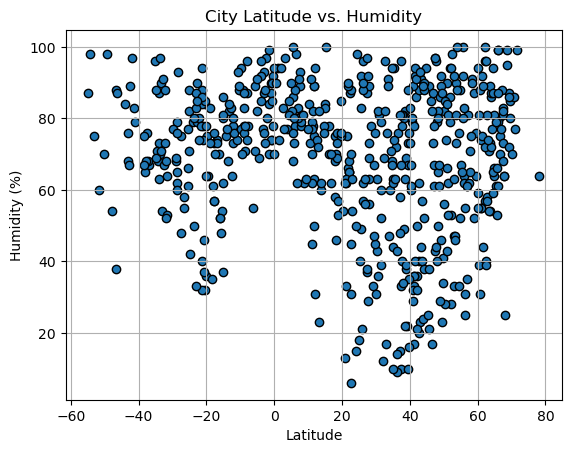

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

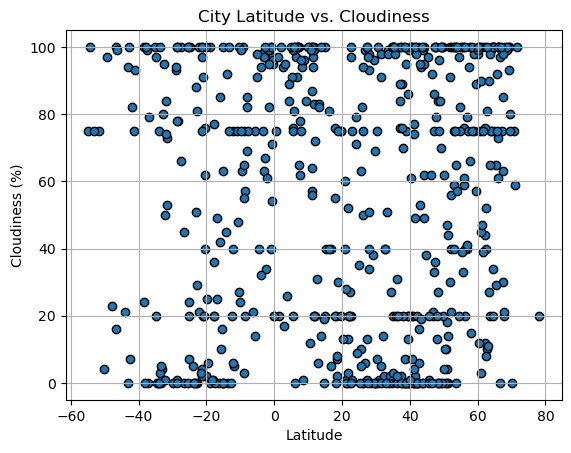

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

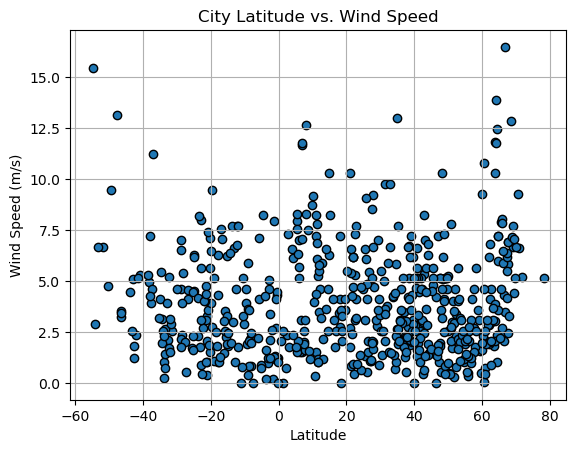

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def regression_graph(Title, X_label, Y_label, X, Y, line_corr):
    slope, intercept, r_value, p_value, std = linregress(X, Y)
    print(f"The r-value is: {r_value}")
    plt.scatter(X, Y, edgecolor='black')
    line = slope * X + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(X, line, color='red')
    plt.annotate(line_eq, line_corr, fontsize=15,color="red")
    plt.title(Title)
    plt.xlabel(X_label)
    plt.ylabel(Y_label)
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,21.76,40,6,0.45,US,1685140525
2,bardai,11.6500,7.2333,26.62,63,100,5.23,NG,1685140717
3,az zuwaytinah,30.9522,20.1202,19.67,81,1,5.00,LY,1685140718
4,lompoc,34.6391,-120.4579,23.72,68,0,5.81,US,1685140718
5,okhotsk,59.3833,143.3000,7.11,64,89,1.55,RU,1685140718


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,lebu,-37.6167,-73.6500,9.77,76,99,3.93,CL,1685140717
6,puerto natales,-51.7236,-72.4875,3.25,60,75,6.69,CL,1685140718
7,el bolson,-41.9667,-71.5167,-0.48,97,82,2.37,AR,1685140718
8,hithadhoo,-0.6000,73.0833,27.83,74,97,4.31,MV,1685140718
10,minas de marcona,-15.2119,-75.1103,14.92,86,100,6.23,PE,1685140718


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7982513319644016


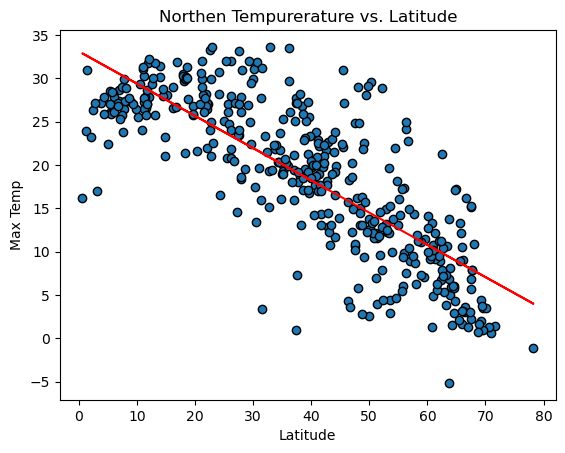

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
Title= 'Northen Tempurerature vs. Latitude'
X= 'Latitude'
Y= 'Max Temp'

regression_graph(Title, X, Y, x_values, y_values, (6,-10))

The r-value is: 0.8459632176719579


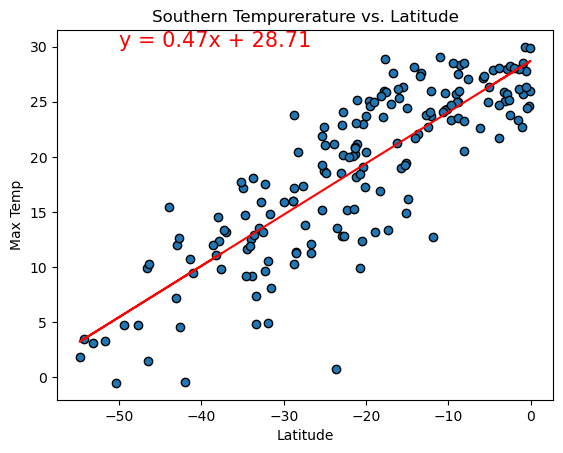

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
Title= 'Southern Tempurerature vs. Latitude'
X= 'Latitude'
Y= 'Max Temp'

regression_graph(Title, X, Y, x_values, y_values, (-50, 30))

**Discussion about the linear relationship:** There is a definite relationship in both these graphs. For both the North and South, as the cities move further from the equator, or Latitude 0, the temperature decreases

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.023961156881443384


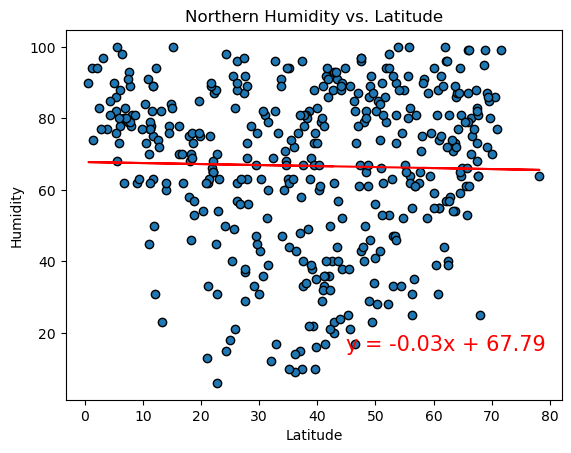

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
Title= 'Northern Humidity vs. Latitude'
X= 'Latitude'
Y= 'Humidity'

regression_graph(Title, X, Y, x_values, y_values, (45, 15))

The r-value is: 0.15350132574587894


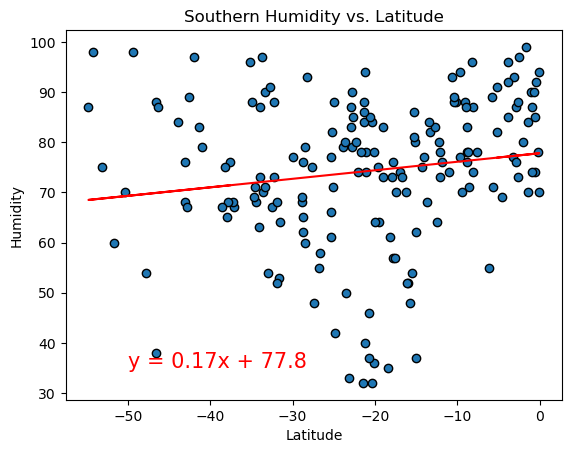

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
Title= 'Southern Humidity vs. Latitude'
X= 'Latitude'
Y= 'Humidity'

regression_graph(Title, X, Y, x_values, y_values, (-50, 35))

**Discussion about the linear relationship:** These graphs show that closer to Latitude 0 the more Humidity can be found in the cities. The North also has much more humidity than in the South graph

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07347004194125427


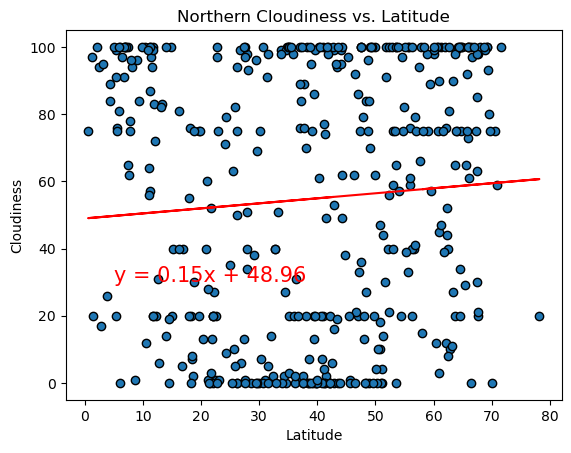

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
Title= 'Northern Cloudiness vs. Latitude'
X= 'Latitude'
Y= 'Cloudiness'

regression_graph(Title, X, Y, x_values, y_values, (5, 30))

The r-value is: 0.06746255957509285


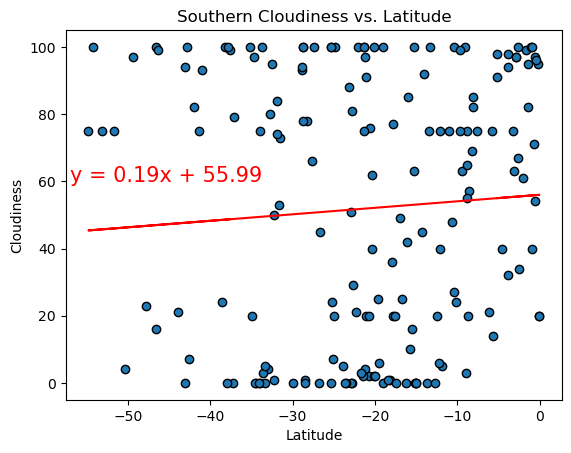

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
Title= 'Southern Cloudiness vs. Latitude'
X= 'Latitude'
Y= 'Cloudiness'

regression_graph(Title, X, Y, x_values, y_values, (-57, 60))

**Discussion about the linear relationship:** There doesn't seem to be any connection between Latitude and Cloudiness in the North. In the South however, it is very clear that as you move further away from Latitude 0 there is much less Cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00023417935413775303


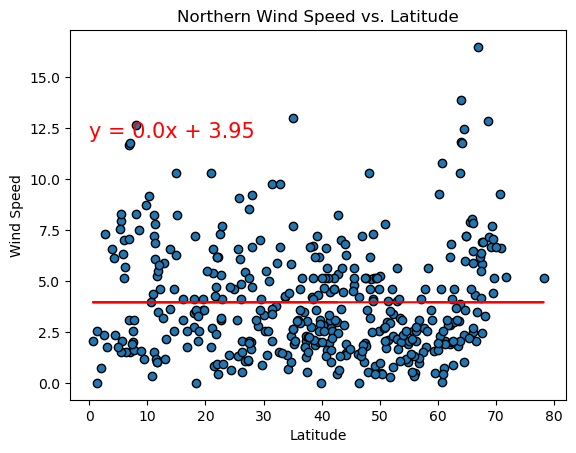

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
Title= 'Northern Wind Speed vs. Latitude'
X= 'Latitude'
Y= 'Wind Speed'

regression_graph(Title, X, Y, x_values, y_values, (0, 12))

The r-value is: -0.2826973588171587


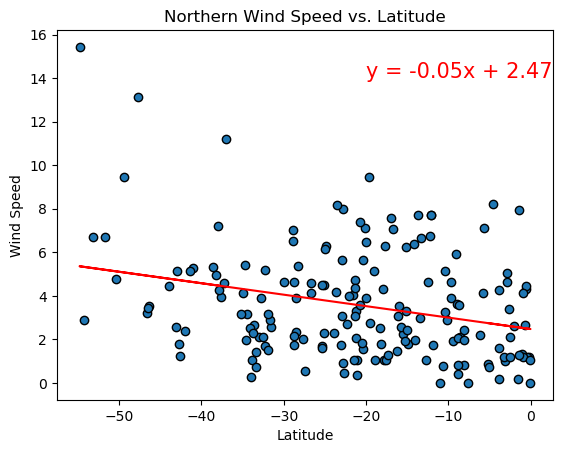

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
Title= 'Northern Wind Speed vs. Latitude'
X= 'Latitude'
Y= 'Wind Speed'

regression_graph(Title, X, Y, x_values, y_values, (-20, 14))

**Discussion about the linear relationship:** These graphs both show that i is much more common to have minimal wind speed in both the North and South and is more rare to have higher wind speeds